-1047.932782250239
                      Coeficient
Avg. Session Length    25.981550
Time on App            38.590159
Time on Website         0.190405
Length of Membership   61.279097
MAE: 7.228148653430832
MSE: 79.81305165097444
RMSE: 8.933815066978633


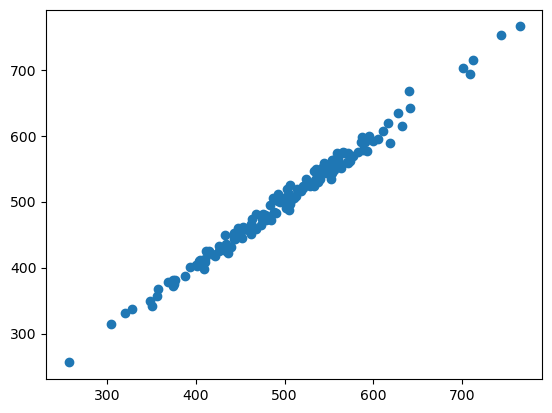

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.metrics import fbeta_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.model_selection import train_test_split

import sklearn as skl
from sklearn import metrics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

import seaborn as sns
import matplotlib.pyplot as plt

#loading data

df_ecommerce = pd.read_csv('Ecommerce Customers.csv') 

#ver colunas

#print(df_sentimentos_data.columns)

#VER SHAPE

#df_ecommerce.shape

#FORMATO DOS DADOS

#df_ecommerce.dtypes

#df_ecommerce.describe()

#MATRIZ DE CORRELAÇÃO - forte correlação entre o length of membership e o yearly amount spent, acaba por ser normal porque quem usa a aplicação à mais tempo normalmente investe mais dinheiro

#corr_matrix = df_ecommerce.corr(numeric_only=True)
#f, ax = plt.subplots(figsize=(10,14))
#sns.heatmap(corr_matrix, vmin=1, vmax=1,square=True, annot=True)

#PLOTS TO CHECK DATA

#sns.pairplot(df_ecommerce,hue="Yearly Amount Spent")


#VER MISSING VALUES

#print(df_ecommerce.isna().sum()) #Não há missing values

#CONTAR NÚMERO DE LINHAS DUPLICADAS

#print(df_ecommerce.duplicated().sum()) 

#Numero de linhas duplicadas = 0

#Eliminar coluna do email, address e avatar

df_clean = df_ecommerce.drop(columns=['Email','Avatar','Address'])

#DEFINIR DADOS DE TREINO E TESTE

x = df_ecommerce[['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership']]
y = df_ecommerce['Yearly Amount Spent']

x_train, x_test, y_train, y_test = train_test_split (x,y, test_size = 0.3, random_state=101)

#MOSTRAR DADOS DE TREINO E TESTE

#sns.histplot(y_train)
#sns.histplot(y_test)

#CRIA E TREINA O MODELO

lm = LinearRegression()
lm.fit(x_train,y_train)

print(lm.intercept_)

#COEFICIENTES PARA TODAS AS COLUNAS

coeff_df = pd.DataFrame(lm.coef_,x.columns,columns=['Coeficient'])
print(coeff_df)

#Coeficient
#Avg. Session Length    25.981550 
#Time on App            38.590159 se aumentar um minuto na aplicação ganho 38,59 dolares
#Time on Website         0.190405
#Length of Membership   61.279097

#ANALISAR AS PREVISOES

predictions = lm.predict(x_test)
plt.scatter(y_test,predictions)

#sns.histplot((y_test-predictions),bins=50);

#METRICAS

print('MAE:', metrics.mean_absolute_error(y_test,predictions)) #Não penalisa MAE: 7.228148653430832
print('MSE:', metrics.mean_squared_error(y_test,predictions)) #MSE: 79.81305165097444
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,predictions))) #Penalise RMSE: 8.933815066978633


